# Tarefa 01

## Parte 1:

In [13]:
from PIL import Image as img
import numpy as np
import math

text = img.open("texto_1.jpg")

#cria o mapa de pixels
def pixelMap(img):
    return img.load()
#escala de cinza
def cinza(image):
    img = image.copy()
    return img.convert('L')
#realce linear
def realce(image, a, b):
    img = image.copy()
    pixels = pixelMap(img)    
    for i in range(img.size[0]):    # for every col:
        for j in range(img.size[1]):    # For every row
            pixels[i,j] = a*pixels[i,j]+b
    return img
#realce po equalização do histograma
def realce2(image):
    img = image.size()
    cont = [0] * 256
    total = img.size[0]*img.size[1]
    pixels = pixelMap(img)
    
    for i in range(img.size[0]):    # for every col:
        for j in range(img.size[1]):    # For every row
            cont[pixels[i,j]] = cont[pixels[i,j]]+1
            
    for i in range(img.size[0]):    # for every col:
        for j in range(img.size[1]):    # For every row
            pixels[i,j] = int((cont[pixels[i,j]] * 255) /total)
            
    return img
#realce logaritimico
def realce3(image, a):
    img = image.copy()
    pixels = pixelMap(img)    
    for i in range(img.size[0]):    # for every col:
        for j in range(img.size[1]):    # For every row
            pixels[i,j] = int( a * math.log( pixels[i,j] + 1 ))
    return img
#limiar com 2 faixas
def limear(image, l1, l2):
    img = image.copy()
    pixels = pixelMap(img)
    
    for i in range(img.size[0]):    # for every col:
        for j in range(img.size[1]):    # For every row
            if pixels[i,j] <= l1:
                pixels[i,j] = 0
            elif l1 < pixels[i,j] and pixels[i,j] <= l2:
                pixels[i,j] = 128
            else:
                pixels[i,j] = 255
    return img

def add_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]+2), int(img1.size[1]+2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            px0[i+1, j+1] = px1[i,j]
    return img0

def del_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]-2), int(img1.size[1]-2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img0.size[0]):
        for j in range(img0.size[1]):
            px0[i,j] = px1[i+1, j+1]
    return img0

def f_laplaciano(image, n):
    img = image.copy()
    px = pixelMap(img)
    
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    v4 = [[0,-1,0],[-1,4,-1],[0,-1,0]]
    v8 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    if n == 4:
        for i in range(1,(img.size[0]-1)):
            for j in range(1,(img.size[1]-1)):
                r = int( (px[i-1,j-1][0]*v4[0][0] + px[i,j-1][0]*v4[0][1] + px[i+1,j-1][0]*v4[0][2] +
                          px[i-1,j][0]*v4[1][0]   + px[i,j][0]*v4[1][1]   + px[i+1,j][0]*v4[1][2]   +
                          px[i-1,j+1][0]*v4[2][0] + px[i,j+1][0]*v4[2][1] + px[i+1,j+1][0]*v4[2][2] )*(1/4)+(px[i,j][0]) )

                g = int( (px[i-1,j-1][1]*v4[0][0] + px[i,j-1][1]*v4[0][1] + px[i+1,j-1][1]*v4[0][2] +
                          px[i-1,j][1]*v4[1][0]   + px[i,j][1]*v4[1][1]   + px[i+1,j][1]*v4[1][2]   +
                          px[i-1,j+1][1]*v4[2][0] + px[i,j+1][1]*v4[2][1] + px[i+1,j+1][1]*v4[2][2] )*(1/4)+(px[i,j][1]) )

                b = int( (px[i-1,j-1][2]*v4[0][0] + px[i,j-1][2]*v4[0][1] + px[i+1,j-1][2]*v4[0][2] +
                          px[i-1,j][2]*v4[1][0]   + px[i,j][2]*v4[1][1]   + px[i+1,j][2]*v4[1][2]   +
                          px[i-1,j+1][2]*v4[2][0] + px[i,j+1][2]*v4[2][1] + px[i+1,j+1][2]*v4[2][2] )*(1/4)+(px[i,j][2]) )
                px1[i,j] = (r,g,b)
        return img1
    elif n == 8:
        for i in range(1,(img.size[0]-1)):
            for j in range(1,(img.size[1]-1)):
                r = int( ((px[i-1,j-1][0]*v8[0][0]) + (px[i,j-1][0]*v8[0][1]) + (px[i+1,j-1][0]*v8[0][2]) +
                          (px[i-1,j][0]*v8[1][0])   + (px[i,j][0]*v8[1][1])   + (px[i+1,j][0]*v8[1][2])   +
                          (px[i-1,j+1][0]*v8[2][0]) + (px[i,j+1][0]*v8[2][1]) + (px[i+1,j+1][0]*v8[2][2]) )*(1/8)+(px[i,j][0]) )

                g = int( (px[i-1,j-1][1]*v8[0][0] + px[i,j-1][1]*v8[0][1] + px[i+1,j-1][1]*v8[0][2] +
                          px[i-1,j][1]*v8[1][0]   + px[i,j][1]*v8[1][1]   + px[i+1,j][1]*v8[1][2]   +
                          px[i-1,j+1][1]*v8[2][0] + px[i,j+1][1]*v8[2][1] + px[i+1,j+1][1]*v8[2][2] )*(1/8)+(px[i,j][1]) )

                b = int( (px[i-1,j-1][2]*v8[0][0] + px[i,j-1][2]*v8[0][1] + px[i+1,j-1][2]*v8[0][2] +
                          px[i-1,j][2]*v8[1][0]   + px[i,j][2]*v8[1][1]   + px[i+1,j][2]*v8[1][2]   +
                          px[i-1,j+1][2]*v8[2][0] + px[i,j+1][2]*v8[2][1] + px[i+1,j+1][2]*v8[2][2] )*(1/8)+(px[i,j][2]) )
                px1[i,j] = (r,g,b)
        return img1
    else:
        print("A vizinhança deve ter tamanho 4 ou 8!!!")


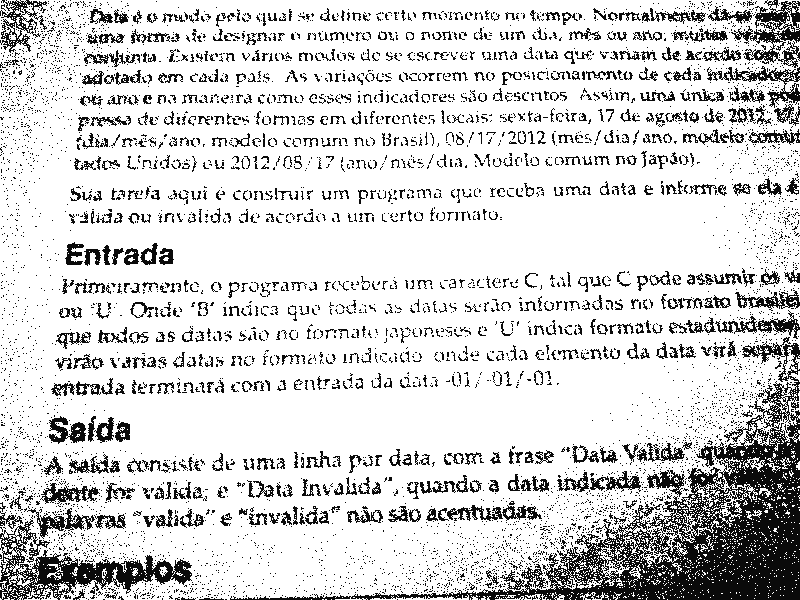

In [95]:
teste = f_laplaciano(text, 8)
teste2 = cinza(teste)
teste3 = realce(teste2, 110, 10)
teste4 = limear(teste3, 230, 230)
teste5 = realce(teste4, 70, 10)

teste5

## Parte 02

In [96]:
text2 = img.open("texto_2.jpg")

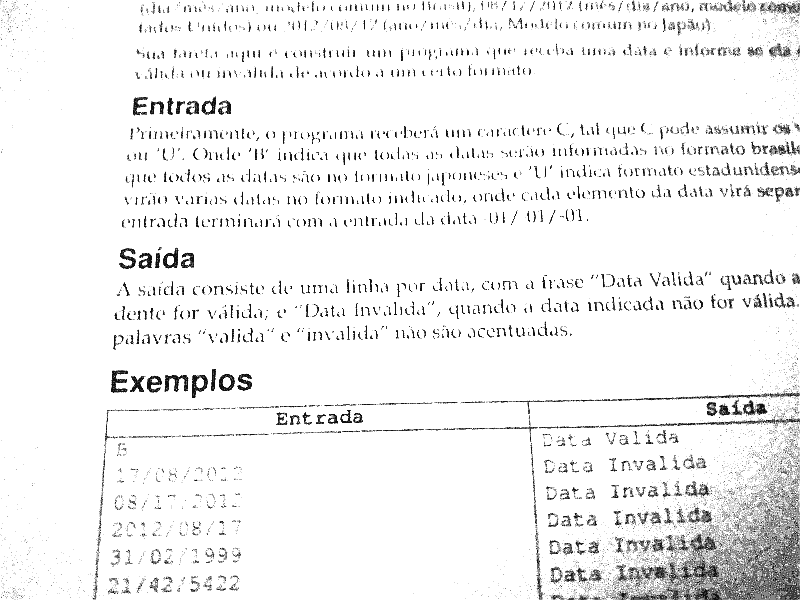

In [118]:
t = f_laplaciano(text2, 8)
t2 = cinza(t)
t3 = realce(t2, 40, 15)

t3

## Salvando os arquivos:

In [119]:
teste5.save("./resource/img/Tarefa01/restauração_1.jpg")
t3.save("./resource/img/Tarefa01/restauração_2.jpg")